<a href="https://colab.research.google.com/github/Soloskey1/Student-Dropout-and-Success-Prediction-/blob/master/Student_Dropout_and_Success_Prediciion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# import models to perform prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# deactivate warning messages
import warnings
warnings.filterwarnings('ignore')

In [27]:
# load data
data = pd.read_csv('/content/drive/MyDrive/my_data/data.csv', delimiter=';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [28]:
# distribution of target
data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [29]:
# encode the 'Target'
encoder = LabelEncoder()
data['Target'] = encoder.fit_transform(data['Target'])

In [30]:
# view the results
data['Target'].value_counts()

,count
Target,
2,2209
0,1421
1,794


In [31]:
# split the data
X = data.drop('Target', axis=1)
y = data['Target']

# split into train and test set, 80-20
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# RandomClassifier model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
# get classification report
y_pred = random_forest.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       316
           1       0.51      0.32      0.39       151
           2       0.77      0.93      0.84       418

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885



In [34]:
# Models
models = [
    LogisticRegression(),
    SVC(),
    LinearSVC(),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(),
    GaussianNB()
]

# Cross-validation and evaluation
results = {}
for model in models:
    cv_scores = cross_val_score(model, x_train, y_train, cv=5)  # 5-fold cross-validation
    results[type(model).__name__] = cv_scores.mean()

# Find the best model
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]

print("Cross-validation results:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

print(f"\nBest model: {best_model_name} with accuracy {best_model_accuracy:.4f}")


Cross-validation results:
LogisticRegression: 0.6830
SVC: 0.5013
LinearSVC: 0.7629
RandomForestClassifier: 0.7742
KNeighborsClassifier: 0.5894
GaussianNB: 0.6886

Best model: RandomForestClassifier with accuracy 0.7742


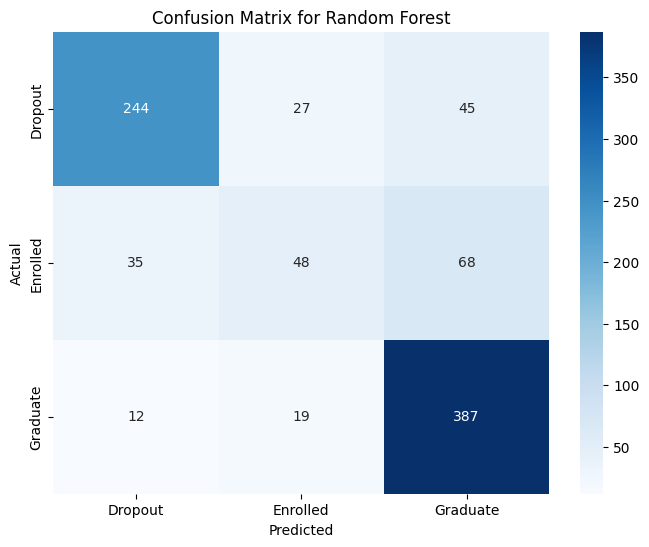

In [38]:
# prompt: confusion matrix for random forest

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()
